In [1]:
def plot_performance_profiles(all_results, methods,noise_levels):
    method_names = list(methods.keys())
    num_methods = len(method_names)
    # Initialize performance profile data
    rho_values = np.logspace(0, 5, 100, base=2) 
    performance_data = {method: np.zeros_like(rho_values) for method in method_names}
    for  results in all_results:
        # Get the minimum function value achieved by any method
        f_min = min(results[method] for method in method_names)
        # Compute performance ratios
        ratios = {}
        for method in method_names:
            f_values = results[method]
            ratios[method] =f_values / f_min
        # Update performance data
        for i, rho in enumerate(rho_values):
            for method in method_names:
                performance_data[method][i] += np.sum(np.array(ratios[method]) <= rho)
    # Normalize the performance data
    for method in method_names:
        performance_data[method] /= len(all_results)
    # Plot performance profiles
    plt.figure(figsize=(8, 6))
    for method in method_names:
        if method=='IF':
            name='IMFIL'
        elif method=='GDada':
            name='GD-ada'
        elif method=='GDC':
            name='GDC (fixed)'
        elif method=='DFCH_09':
            name=r"$\beta=0.9$"
        elif method=='DFCH_095':
            name=r"$\beta=0.95$"
        elif method=='DFCH_08':
            name=r"$\beta=0.8$"
        elif method=='DFC':
            name=r"$\beta=0$"
        else:
            name=method
        plt.plot(rho_values, performance_data[method], label=name,marker='x')
    
    plt.xlabel('Performance Ratio',fontsize=18)
    title = "Noise levels: " + ", ".join("{:.0e}".format(level) if level != 0 else "0" for level in noise_levels)
    plt.title(title,fontsize=24)
    plt.xscale('log', base=2)
    plt.legend(fontsize=18, loc='lower right')
    tick_locations = [1, 2, 4, 8, 16, 32]
    tick_labels = [str(tick) for tick in tick_locations]
    plt.xticks(tick_locations, tick_labels)
    plt.tick_params(axis='both', labelsize=16)
    plt.grid(True)
    filename = "C1L-HB-noiseless=" + ", ".join(str(level) for level in noise_levels) + ".png"
    plt.savefig("IMG/" + filename)
    plt.show()
#plot_performance_profiles(all_results[index], methods,noise_levels_all[index])

{0: [], 1: [], 2: [], 3: []}
Test 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

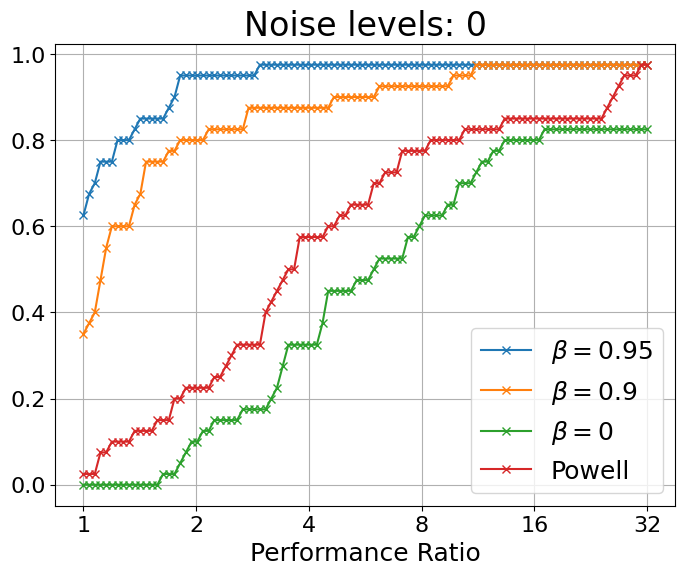

Test 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 

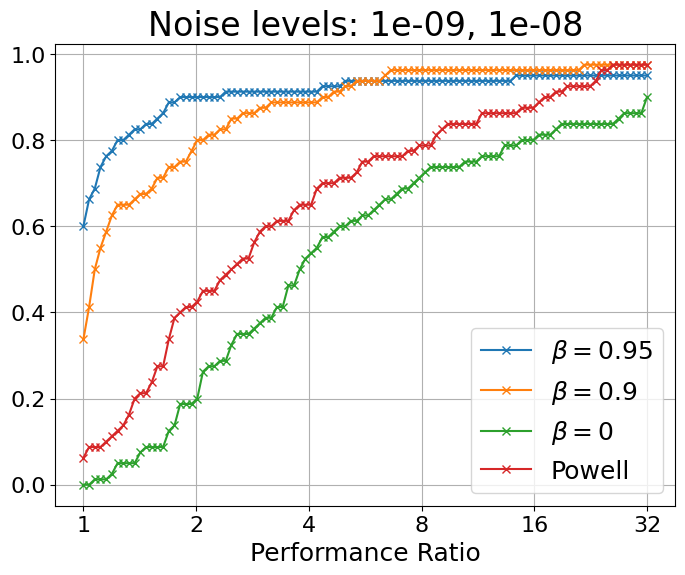

Test 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 

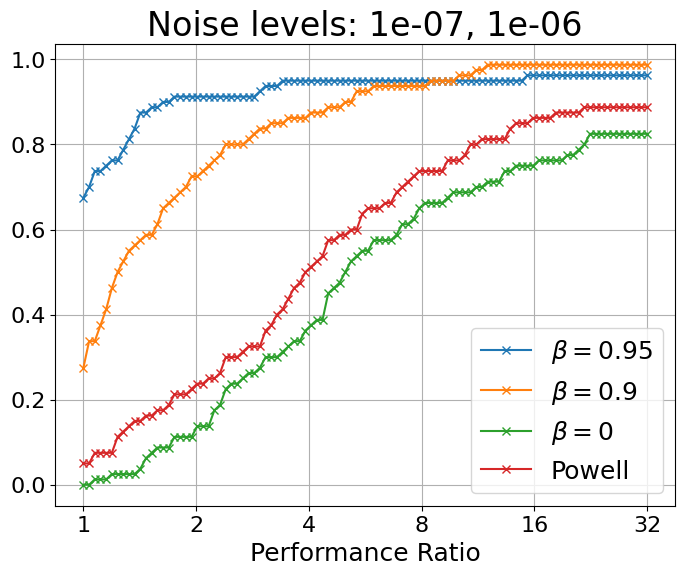

Test 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 

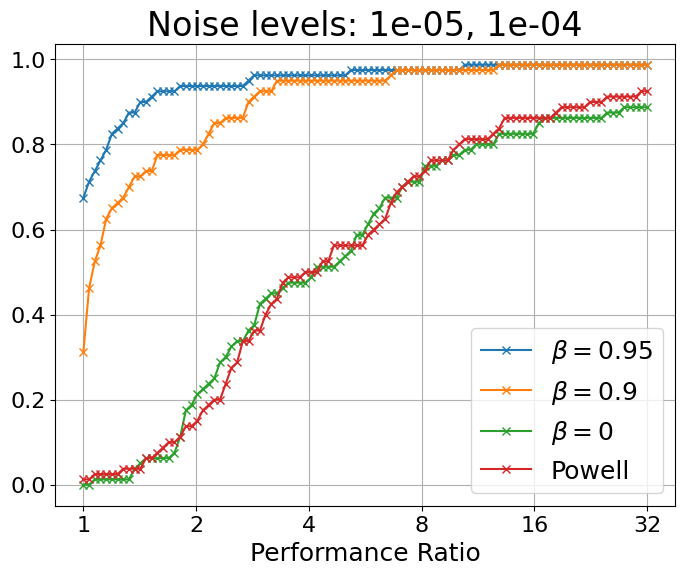

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
import numpy as np
import dfree 
import handcode
import importlib
importlib.reload(dfree)
importlib.reload(handcode)
import dfree as drf
from handcode import implicit
from handcode import RG
from handcode import DFC
from handcode import DFCH
from handcode import DFCLL
from handcode import GDada
from handcode import GD_FD_constant
methods = {"DFCH_095":"DFCH_095",
    "DFCH_09":"DFCH_09",
    # "DFCH_08":"DFCH_08",
    "DFC": "DFC",
    "Powell":"Powell", 
     # "COBYLA":"COBYLA", 
          }
# Function to generate random A matrix and b vector with noise
def generate_data(n):
    A = np.random.randn(n, n)
    b = np.random.randn(n)  
    return A, b

# Cost function for least squares problem
def cost_function_least_squares(A, b, x):
    return np.linalg.norm(np.dot(A, x) - b)**2

# Cost function for the new function
def cost_function_new_function(A, b, x):
    return np.sum(np.log(1 + (np.dot(A, x) - b)**2))

# Values of n to test
noise_levels = [0,1e-9]
first_entry = 10
last_entry = 200
distance = 10

# Generate the list
n_values = list(range(first_entry, last_entry + distance, distance))
noise_levels_all=[[0],[1e-9,1e-8],[1e-7,1e-6],[1e-5,1e-4]]
noise_levels_all=[[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]]
noise_levels_all=[[0],[1e-9,1e-8],[1e-7,1e-6],[1e-5,1e-4]]
np.random.seed(42)
problem_names=['LS','NC']
all_results={i:[] for i in range(len(noise_levels_all))}
print(all_results)
index=-1;

for noise_levels in noise_levels_all:
    index=index+1
    cs=0;
    print('Test',end=' ')
    for problem_name in problem_names:
        method_names = list(methods.keys())
        counts = {method_name: 0 for method_name in methods}
        for n in n_values:
            for noise_level in noise_levels:    
                A, b = generate_data(n);
                A=A;
                if problem_name=='LS':
                    def f_LS_true(x):
                        return cost_function_least_squares(A, b, x)
                    def f_LS_noisy(x):
                        noise=noise_level*np.random.uniform(-1,1)
                        return f_LS_true(x)+noise   
                if problem_name=='NC':    
                    def f_LS_true(x):
                        return cost_function_new_function(A, b, x)
                    def f_LS_noisy(x):
                        noise=noise_level*np.random.uniform(-1,1)
                        return f_LS_true(x)+noise
                maxcount=200*n;
                x_init=np.zeros(n);
                results = []
                cost_all=[]
                rr = {}
                funoptim=0
                cs+=1;
                print(cs,end=' ')
                for method_name, method_value in methods.items():
                    if method_value=='DFC':
                        x, fun_all_DFC,countall_DFC = DFC(f_LS_noisy,f_LS_true, x_init, maxcount, eps=1e-2, L=None)
                        cost_dfc = min(fun_all_DFC)
                        results.append(cost_dfc)
                        rr[method_name] =cost_dfc-funoptim
                    if method_value=='DFCH_09':
                        x, fun_all_DFCH_09,countall_DFCH_09 = DFCH(f_LS_noisy,f_LS_true, x_init, maxcount, eps=1e-2, L=None,beta=0.9)
                        cost_dfc = min(fun_all_DFCH_09)
                        results.append(cost_dfc)
                        rr[method_name] =cost_dfc-funoptim
                    if method_value=='DFCH_08':
                        x, fun_all_DFCH_08,countall_DFCH_08 = DFCH(f_LS_noisy,f_LS_true, x_init, maxcount, eps=1e-2, L=None,beta=0.8)
                        cost_dfc = min(fun_all_DFCH_08)
                        results.append(cost_dfc)
                        rr[method_name] =cost_dfc-funoptim
                    if method_value=='DFCH_095':
                        x, fun_all_DFCH_095,countall_DFCH_095 = DFCH(f_LS_noisy,f_LS_true, x_init, maxcount, eps=1e-2, L=None,beta=0.95)
                        cost_dfc = min(fun_all_DFCH_095)
                        results.append(cost_dfc)
                        rr[method_name] =cost_dfc-funoptim
                    if method_value == "Powell":
                        function_values_powel = [f_LS_true(x_init)]
                        def callback_function(x, *args):
                            function_values_powel.append(f_LS_true(x))
                        # Using SciPy optimization methods
                        result = minimize(f_LS_noisy, x_init, method='Powell', options={'maxfev': maxcount},callback=callback_function)
                        #results.append(problem.obj(result.x))
                        results.append(min(function_values_powel))
                        rr[method_name] =min(function_values_powel)-funoptim
                    if method_value == "COBYLA":
                        # Using SciPy optimization methods
                        result = minimize(f_LS_noisy, x_init, method='COBYLA', options={'maxiter': maxcount})
                        results.append(f_LS_true(result.x))
                        rr[method_name] =f_LS_true(result.x)-funoptim
                all_results[index].append(rr)
                min_index = np.argmin(results)
                formatted_results = ["{:.3e}".format(r) if isinstance(r, float) else r for r in results]
                formatted_results = []
                for i, val in enumerate(results):
                    # If the current index is the index of the smallest value, bold it
                    if i == min_index:
                        formatted_results.append("\\underline{" + "{:.3e}".format(val) + "}")  # Bold formatting
                    else:
                        formatted_results.append("{:.3e}".format(val))                
                lowest_method = list(methods.keys())[min_index]
                counts[lowest_method] += 1
                level=noise_level;
    plot_performance_profiles(all_results[index], methods,noise_levels_all[index])
                    